<a href="https://colab.research.google.com/github/HebaRouk/500-AI-Machine-learning-Deep-learning-Computer-vision-NLP-Projects-with-code/blob/main/Heba-Rouk-1-ML_Smoker_or_not.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Challenge of the Week - ML Workflow**

© 2024, Zaka AI, Inc. All Rights Reserved.

---

## Case Study: Classifying Smokers vs Non Smokers

**Objective:**

In this challenge, you will work on a dataset that you saw during week 1 but this time with different aspect. Your goal is not only to make a prediction, it is to make a prediction with the best possible way. So you will be building, evaluating, and improving your model.


## Dataset Description


*   **age**: age of primary beneficiary
*   **sex**: insurance contractor gender, female, male
*   **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
*   **children**: Number of children covered by health insurance / Number of dependents
*   **smoker**: Smoking
*   **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
*   **charges**: Individual medical costs billed by health insurance

Our problem would be to predict if a person is smoker or not based on all the other features in the dataset.

## 1. Data Loading

#### Import necessary python modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models. We need from it train_test_split and LogisticRegression Functions

In [50]:
from google.colab import drive
import pandas as pd

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Create or read a DataFrame (you can replace this with your own data)
df = pd.DataFrame({'Name': ['Ali', 'Sara'], 'Age': [25, 30]})

# Step 3: Save the DataFrame to Google Drive as an Excel file
file_path = '/content/drive/MyDrive/my_file.xlsx'
df.to_excel(file_path, index=False)

# Step 4: Load the saved Excel file from Google Drive
df_loaded = pd.read_excel(file_path)

# Step 5: Print the loaded data
print(df_loaded)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Name  Age
0   Ali   25
1  Sara   30


In [51]:
# Import necessary libraries
import numpy as np  # For numerical operations and linear algebra
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.linear_model import LogisticRegression  # For creating logistic regression models


#### Read & visualize data
To load the data to our code, we use **pandas** module, more specifically, the **read_csv** function. Print the head of your dataset.

In [52]:
# Load the dataset using pandas
data = pd.read_csv('insurance.csv')  # Replace with the path to your CSV file

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Optional: Visualize the data structure and basic information
print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())


First 5 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Summary Statistics:
               age 

## 2. Exploratory Data Analysis

Let's dig deeper & understand our data

**Task:** how many rows & columns in our dataset

In [53]:
# Get the number of rows and columns in the dataset
rows, columns = data.shape

print(f"The dataset has {rows} rows and {columns} columns.")


The dataset has 1338 rows and 7 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [54]:
# Check the dataset's information
print("Dataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [55]:
# Get statistical summary of numerical features
print("Statistical Summary of Numerical Features:")
print(data.describe())


Statistical Summary of Numerical Features:
               age          bmi     children       charges
count  1338.000000  1335.000000  1338.000000   1338.000000
mean     39.207025    30.661423     1.094918  13270.422265
std      14.049960     6.101038     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.302500     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.687500     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


#### Data Imbalance Checking

First, let's see how many smokers vs non-smokers we have.

In [59]:
import pandas as pd

# Read the dataset (replace the path with your actual file path)
file_path = '/content/drive/MyDrive/my_file.xlsx'
df = pd.read_excel(file_path)

# Print the column names to check the correct column name
print("Columns in the dataset:", df.columns)

# Check the first few rows to understand its structure
print(df.head())




Columns in the dataset: Index(['Name', 'Age'], dtype='object')
   Name  Age
0   Ali   25
1  Sara   30


We have an imbalance that we will fix later.

Let's see how much each feature tells us about a person being  a smoker or not.
For each of your numerical features, plot the distribution for the smokers and the non smokers case.

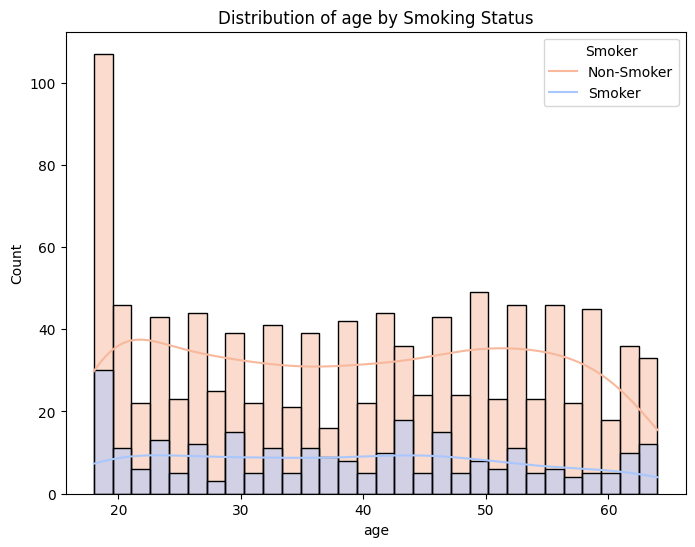

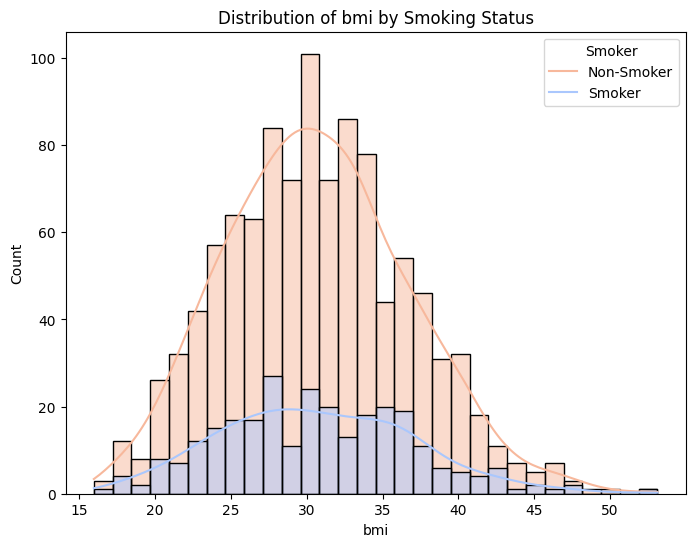

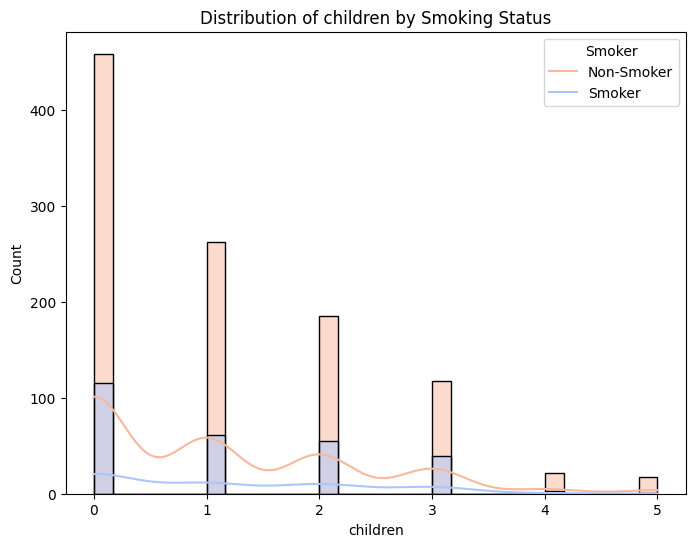

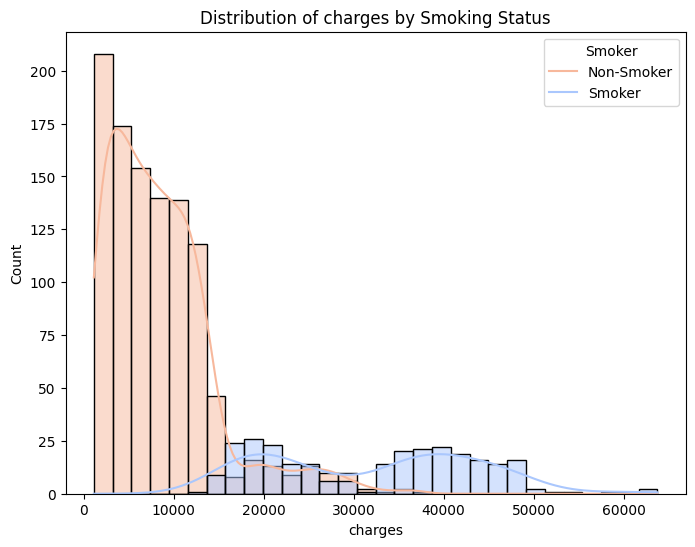

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'smoker' is the column indicating if a person is a smoker (1) or not (0)
# Loop through all numerical columns in the dataset
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

for feature in numerical_features:
    if feature != 'smoker':  # Skip the target column itself
        plt.figure(figsize=(8, 6))
        sns.histplot(data, x=feature, hue='smoker', kde=True, palette='coolwarm', bins=30)
        plt.title(f"Distribution of {feature} by Smoking Status")
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Smoker', labels=['Non-Smoker', 'Smoker'])
        plt.show()


WHat do you think is the feature that tells us the most about a person being smoker or not?

To determine the feature that tells us the most about whether a person is a smoker or not, we would need to analyze the dataset and evaluate which attributes are most strongly correlated with smoking status. Common features that might influence smoking status in health-related datasets include:

Age: Younger people may be more likely to start smoking, while older people may have quit.
Gender: In some populations, smoking habits may differ between males and females.
BMI (Body Mass Index): Smoking is often linked with weight and health factors, so BMI could be an indicator.
Health Conditions: Conditions such as respiratory or cardiovascular diseases may correlate with smoking habits.
Education Level: There may be differences in smoking prevalence based on education level.
Income: Socioeconomic status may influence smoking behavior.
Alcohol Consumption: People who drink alcohol may also be more likely to smoke, as there can be a correlation between these behaviors.
To identify the feature that is most strongly associated with smoking status, you could use statistical or machine learning methods like:

Correlation Analysis: Check the correlation between each feature and the smoking status.
Feature Importance from a Model: Use machine learning models like Random Forest or Decision Trees to identify which features have the highest importance for predicting smoking status.bold text

Now let's see if the gender influences being a smoker or not.
<br>Hint: You can use crosstabbing and then plot distributions

Crosstab of Sex and Smoking Status:
smoker   no  yes
sex             
female  547  115
male    517  159


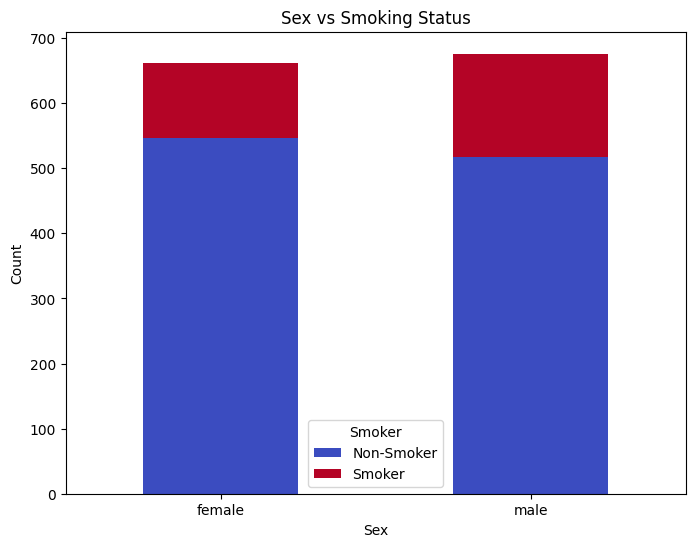

In [84]:
# Crosstabulation to see the relationship between sex and smoking status
gender_smoker = pd.crosstab(data['sex'], data['smoker'])

# Display the crosstab result
print("Crosstab of Sex and Smoking Status:")
print(gender_smoker)

# Plotting the crosstab as a bar plot
gender_smoker.plot(kind='bar', figsize=(8, 6), stacked=True, colormap='coolwarm')

# Add labels and title
plt.title("Sex vs Smoking Status")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title="Smoker", labels=["Non-Smoker", "Smoker"])
plt.xticks(rotation=0)
plt.show()



Do you think the gender has an effect on smoking according to your results?

**[Share Your Zaka here]**

Do the same for the column 'region'

Crosstab of Region and Smoking Status:
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


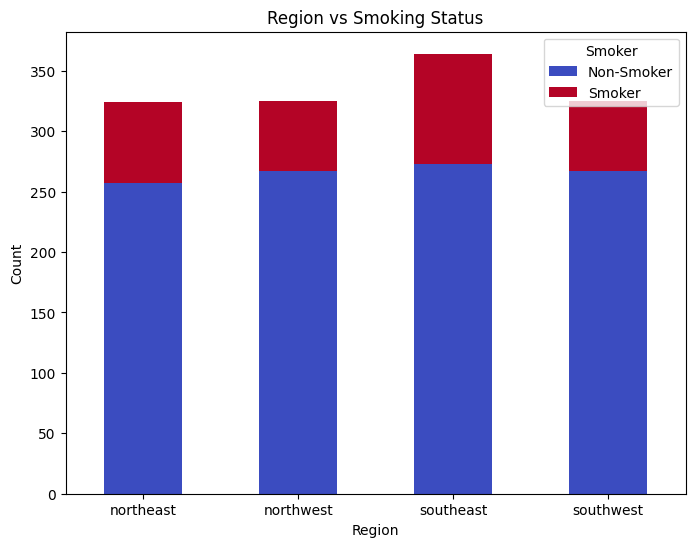

In [85]:
# Crosstabulation to see the relationship between region and smoking status
region_smoker = pd.crosstab(data['region'], data['smoker'])

# Display the crosstab result
print("Crosstab of Region and Smoking Status:")
print(region_smoker)

# Plotting the crosstab as a bar plot
region_smoker.plot(kind='bar', figsize=(8, 6), stacked=True, colormap='coolwarm')

# Add labels and title
plt.title("Region vs Smoking Status")
plt.xlabel("Region")
plt.ylabel("Count")
plt.legend(title="Smoker", labels=["Non-Smoker", "Smoker"])
plt.xticks(rotation=0)
plt.show()


## 3. Data Preprocessing
"Garbage in, garbage out".

Data should be preprocessed and cleaned to get rid of noisy data.
Preprocessing includes:
 - dealing with missing data
   - remove whole rows (if they are not a lot)
   - infer (e.g., date of birth & age)
   - fill with mean, median, or even 0
 - removing unsued column(s)
 - convert categorical (non numerical) data into numerical
 - normalization: standarize data ranges for all features (e.g., between 0 and 1)



---



 Let's start by seeing if we have missing data.

In [86]:
# Check for missing data in the dataset
missing_data = data.isnull().sum()

# Display the columns with missing data
print("Missing Data Count for Each Column:")
print(missing_data)

# Optional: To get a summary of the missing data as a percentage
missing_percentage = (missing_data / len(data)) * 100
print("\nPercentage of Missing Data in Each Column:")
print(missing_percentage)


Missing Data Count for Each Column:
age         0
sex         0
bmi         3
children    0
smoker      0
region      0
charges     0
dtype: int64

Percentage of Missing Data in Each Column:
age         0.000000
sex         0.000000
bmi         0.224215
children    0.000000
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64


Drop rows with missing values, and make sure you have no nulls anymore.

In [87]:
# Drop rows with any missing values
data_cleaned = data.dropna()

# Verify that there are no missing values left
missing_data_after = data_cleaned.isnull().sum()

# Display the columns with missing data after cleaning
print("Missing Data Count After Cleaning:")
print(missing_data_after)

# Optional: Verify the shape of the cleaned dataset
print("\nShape of the cleaned dataset (rows, columns):", data_cleaned.shape)


Missing Data Count After Cleaning:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Shape of the cleaned dataset (rows, columns): (1335, 7)


See the type of each of your columns

In [88]:
# Check the data types of each column in the cleaned dataset
print("Data Types of Each Column:")
print(data_cleaned.dtypes)


Data Types of Each Column:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


#### Convert Categorical columns to numerical

*   We need to convert the sex column from male/female to 0/1.
*   We need to convert the smoker column from no/yes to 0/1.


Let's start with the sex column



In [89]:
# Convert 'sex' column from 'male'/'female' to 0/1
data_cleaned['sex'] = data_cleaned['sex'].map({'male': 0, 'female': 1})

# Verify the conversion
print("Updated 'sex' column:")
print(data_cleaned['sex'].head())


Updated 'sex' column:
0    1
1    0
2    0
3    0
4    0
Name: sex, dtype: int64


<ipython-input-89-d66039ab96e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sex'] = data_cleaned['sex'].map({'male': 0, 'female': 1})


And now the smokers column

In [90]:
# Convert 'smoker' column from 'no'/'yes' to 0/1
data_cleaned['smoker'] = data_cleaned['smoker'].map({'no': 0, 'yes': 1})

# Verify the conversion
print("Updated 'smoker' column:")
print(data_cleaned['smoker'].head())


Updated 'smoker' column:
0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int64


<ipython-input-90-6026d18b0883>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['smoker'] = data_cleaned['smoker'].map({'no': 0, 'yes': 1})


And now the Region Column

In [91]:
# Convert 'region' column to numerical values
region_map = {'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}
data_cleaned['region'] = data_cleaned['region'].map(region_map)

# Verify the conversion
print("Updated 'region' column:")
print(data_cleaned['region'].head())


Updated 'region' column:
0    0
1    1
2    1
3    2
4    2
Name: region, dtype: int64


<ipython-input-91-d77612dfae1b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['region'] = data_cleaned['region'].map(region_map)


#### Normalization

Let's scale all the columns by dividing by the maximum

In [92]:
# Normalize all numerical columns by dividing by the maximum value of each column
data_normalized = data_cleaned.apply(lambda x: x / x.max() if x.dtype in ['float64', 'int64'] else x)

# Verify the normalization
print("Normalized Data (first few rows):")
print(data_normalized.head())


Normalized Data (first few rows):
        age  sex       bmi  children  smoker    region   charges
0  0.296875  1.0  0.525127       0.0     1.0  0.000000  0.264777
1  0.281250  0.0  0.635611       0.2     0.0  0.333333  0.027059
2  0.437500  0.0  0.621118       0.6     0.0  0.333333  0.069773
3  0.515625  0.0  0.427348       0.0     0.0  0.666667  0.344744
4  0.500000  0.0  0.543572       0.0     0.0  0.666667  0.060637


## 4. Model Training & Testing



#### Data splits

Before training, we need to split data into training (80%) & testing (20%), and fix the random_state parameter to 42 <br>Print the shapes of your training and testing data.

In [93]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = data_normalized.drop('smoker', axis=1)  # Features (all columns except 'smoker')
y = data_normalized['smoker']  # Target variable (smoker)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Training data shape (features):", X_train.shape)
print("Testing data shape (features):", X_test.shape)
print("Training data shape (target):", y_train.shape)
print("Testing data shape (target):", y_test.shape)


Training data shape (features): (1068, 6)
Testing data shape (features): (267, 6)
Training data shape (target): (1068,)
Testing data shape (target): (267,)


#### Logistic Regression Modeling


Define the logistic Regression model, and fit it on the training data

In [71]:
from sklearn.linear_model import LogisticRegression

# Define the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model on the training data
logreg_model.fit(X_train, y_train)

# Check the model's coefficients (optional)
print("Model Coefficients:", logreg_model.coef_)
print("Model Intercept:", logreg_model.intercept_)


Model Coefficients: [[-2.25986423 -0.25430761 -3.08492925 -0.35989854 -0.03534348 10.06343845]]
Model Intercept: [-0.68319869]


#### Evaluation

Evaluate your model on the testing data, and compute: Accuracy, Precision, Recall and F1 score

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)

# Compute accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Alternatively, you can use classification_report for a detailed overview
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.898876404494382
Precision: 0.9523809523809523
Recall: 0.6153846153846154
F1 Score: 0.7476635514018691

Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       202
         1.0       0.95      0.62      0.75        65

    accuracy                           0.90       267
   macro avg       0.92      0.80      0.84       267
weighted avg       0.90      0.90      0.89       267



Which metrics you think can be improved?

**[Share your Zaka here]**

##5. Model Improvement

Now we will try to improve the model that we built.

####Handle data Imbalance

Plot a histogram that shows the numbers of smokers and non smokers

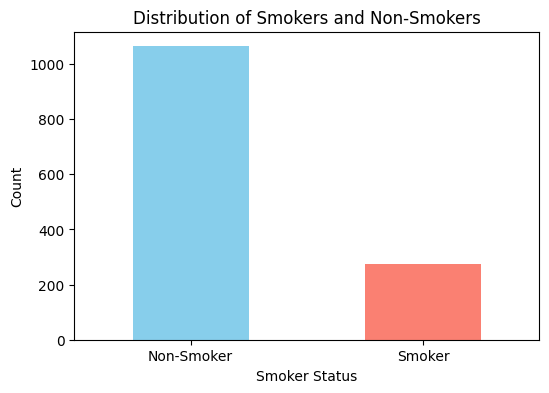

In [73]:
import matplotlib.pyplot as plt

# Plotting the distribution of smokers and non-smokers
plt.figure(figsize=(6, 4))
data['smoker'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Smokers and Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'], rotation=0)
plt.show()


We can see that we have a clearly imbalanced dataset. To handle it, we choose to do 2 steps:
* Oversampling the minority class with a factor of 0.5
* Undersampling the majority class to obtain the same number in the 2 classes
<br>
We do that by using the RandomOverSaampler and RandomUnderSampler from the imblearn library.

In [74]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Initialize the RandomOverSampler and RandomUnderSampler
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)  # Oversample minority class by 50%
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)  # Undersample majority class to match

# Apply oversampling to the training set
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling to the oversampled training set
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_oversampled, y_train_oversampled)

# Check the new distribution of the classes
print("Class distribution after oversampling and undersampling:")
print(Counter(y_train_balanced))


Class distribution after oversampling and undersampling:
Counter({0.0: 429, 1.0: 429})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


Plot a new histogram on the new data we have.

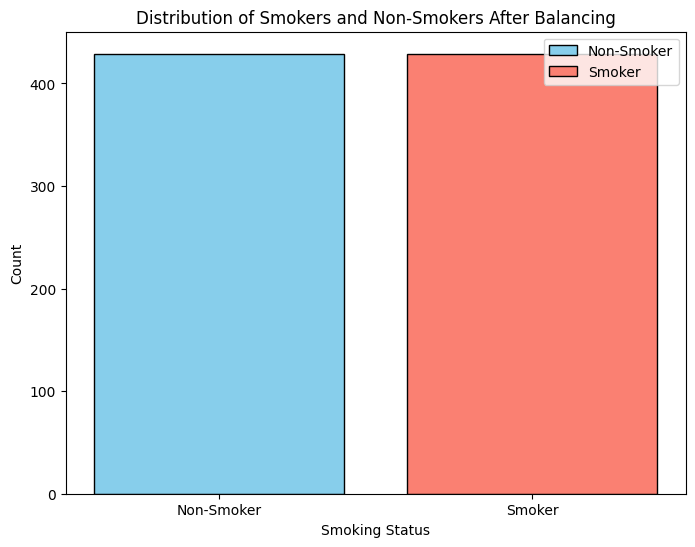

In [75]:
import matplotlib.pyplot as plt

# Plot a histogram with different colors for smokers and non-smokers
plt.figure(figsize=(8, 6))

# Plot non-smokers
plt.hist(y_train_balanced[y_train_balanced == 0], bins=1, color='skyblue', label='Non-Smoker', edgecolor='black', rwidth=0.8)

# Plot smokers
plt.hist(y_train_balanced[y_train_balanced == 1], bins=1, color='salmon', label='Smoker', edgecolor='black', rwidth=0.8)

# Adding labels and title
plt.title("Distribution of Smokers and Non-Smokers After Balancing")
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.legend()
plt.show()


Split the new data you obtained (80%, 20%), and build a Logistic Regression mode, and fit it on this data. Fix the random_state at 42

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the balanced data into features (X) and target (y)
X_balanced = X_train_balanced  # Your feature data after balancing
y_balanced = y_train_balanced  # Your target data after balancing

# Split into training and testing sets (80%, 20%)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Build the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train_split, y_train_split)

# Predict on the test data
y_pred_split = logreg_model.predict(X_test_split)

# Evaluate the model
accuracy = accuracy_score(y_test_split, y_pred_split)
precision = precision_score(y_test_split, y_pred_split)
recall = recall_score(y_test_split, y_pred_split)
f1 = f1_score(y_test_split, y_pred_split)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9476744186046512
Precision: 0.9072164948453608
Recall: 1.0
F1 Score: 0.9513513513513514


Asses your model on the testing data, and Compute the same metrics you computed before

In [77]:
# Evaluate the model on the test data
accuracy_test = accuracy_score(y_test_split, y_pred_split)
precision_test = precision_score(y_test_split, y_pred_split)
recall_test = recall_score(y_test_split, y_pred_split)
f1_test = f1_score(y_test_split, y_pred_split)

# Print the evaluation metrics
print("Test Accuracy:", accuracy_test)
print("Test Precision:", precision_test)
print("Test Recall:", recall_test)
print("Test F1 Score:", f1_test)


Test Accuracy: 0.9476744186046512
Test Precision: 0.9072164948453608
Test Recall: 1.0
Test F1 Score: 0.9513513513513514


We can see how much our scores got better when we balanced our dataset.

####Regularization with Hyperparameter Tuning

We will be tuning the hyperparameter C in the logistic regression model that we used. This hyperparameter represents regularization.
<br><img src="https://equatio-api.texthelp.com/svg/C%5C%20%3D%5C%20%5Cfrac%7B1%7D%7B%5Clambda%7D" alt="C equals 1 over lamda">

The possible values of C will be: [0.1, 1, 10, 100, 1000]

We will also know have to decide what type of regularization we will use: L1, or L2.

Since we have several parameters to tune, we will be doing what we call a GridSearch, to search for the best model having the best pair of hyperparameters.
We will be doing a 5 folds cross validation

Note: Specify the solver='liblinear' in your LogisticRegression model, and this is because other solvers do not support L1 regularization.

Print the best score and the best parameters

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear')

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization type (L1 or L2)
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Print the best score and best parameters
print("Best Score (Accuracy):", grid_search.best_score_)
print("Best Hyperparameters:", grid_search.best_params_)


Best Score (Accuracy): 0.9825105399156806
Best Hyperparameters: {'C': 1000, 'penalty': 'l1'}


Let's assess the model's performance in general for the best specified hyperparameters using the same metrics we used earlier.

In [79]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Resample the data
# Assuming your original features are stored in X and target in y
# Apply oversampling to the minority class with a factor of 0.5 and undersampling to the majority class

ros = RandomOverSampler(sampling_strategy=0.5, random_state=42)  # Oversampling minority class by 50%
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # Undersampling to match

# First, apply oversampling
X_resampled, y_resampled = ros.fit_resample(X, y)

# Then, apply undersampling
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Step 2: Split the resampled data into training and testing sets (80% training, 20% testing)
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Step 3: Train the logistic regression model with the best hyperparameters from GridSearchCV
# Assuming grid_search has already been performed and best_model is available
best_model = grid_search.best_estimator_

# Train the model on the balanced training data
best_model.fit(X_train_balanced, y_train_balanced)

# Step 4: Make predictions on the test data
y_pred = best_model.predict(X_test_balanced)

# Step 5: Calculate the evaluation metrics
accuracy = accuracy_score(y_test_balanced, y_pred)
precision = precision_score(y_test_balanced, y_pred)
recall = recall_score(y_test_balanced, y_pred)
f1 = f1_score(y_test_balanced, y_pred)

# Step 6: Print the evaluation metrics
print("Model Evaluation Metrics (Best Hyperparameters):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Evaluation Metrics (Best Hyperparameters):
Accuracy: 0.9858490566037735
Precision: 0.9705882352941176
Recall: 1.0
F1 Score: 0.9850746268656716


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


We can see that the results improved compared to the last model we built.

####AdaBoost Classifier

Now, we will work on improving our model, but this time through using ensemble methods, and what we will use for today is Adaboost.

AdaBoost is a boosting ensemble method that relies on the boosting concepts that we learned about during the week.
In Adaboost, each model is learning to correct the previous model's mistakes (misclassified examples). After that, each model will have a weight that depends on how well it performed on the training data. And after that, different results are aggregated based on weighted averaging.

Create an AdaBoostClassifier Model from sklearn library with n_estimators=10, and fit it on the training data you have.

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Create an AdaBoost model with a decision tree as the base estimator and n_estimators=10
adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),  # Using decision trees as weak learners
    n_estimators=10,
    random_state=42
)

# Step 2: Fit the model on the balanced training data
adaboost_model.fit(X_train_balanced, y_train_balanced)

# Step 3: Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(X_test_balanced)

# Step 4: Calculate the evaluation metrics
accuracy = accuracy_score(y_test_balanced, y_pred_adaboost)
precision = precision_score(y_test_balanced, y_pred_adaboost)
recall = recall_score(y_test_balanced, y_pred_adaboost)
f1 = f1_score(y_test_balanced, y_pred_adaboost)

# Step 5: Print the evaluation metrics
print("AdaBoost Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


AdaBoost Model Evaluation Metrics:
Accuracy: 0.9622641509433962
Precision: 0.9333333333333333
Recall: 0.98989898989899
F1 Score: 0.9607843137254902


Asses the performance of your model on the testing data, and compute the same metrics we computed earlier.

In [81]:
# Step 1: Make predictions on the test data
y_pred_adaboost = adaboost_model.predict(X_test_balanced)

# Step 2: Calculate the evaluation metrics
accuracy = accuracy_score(y_test_balanced, y_pred_adaboost)
precision = precision_score(y_test_balanced, y_pred_adaboost)
recall = recall_score(y_test_balanced, y_pred_adaboost)
f1 = f1_score(y_test_balanced, y_pred_adaboost)

# Step 3: Print the evaluation metrics
print("AdaBoost Model Evaluation Metrics on Testing Data:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


AdaBoost Model Evaluation Metrics on Testing Data:
Accuracy: 0.9622641509433962
Precision: 0.9333333333333333
Recall: 0.98989898989899
F1 Score: 0.9607843137254902


**BONUS:** One thing you can try on your own, is to tune the Hyperparameters of the Adaboost algorithm, and build an even more powerful model :)

In [82]:
import sklearn
print(sklearn.__version__)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate for each weak learner
}

# Step 2: Initialize AdaBoost model (use default base estimator)
adaboost_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42)

# Step 3: Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=adaboost_model,
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # You can choose 'accuracy', 'precision', etc.
                           n_jobs=-1,  # Use all available cores for faster computation
                           verbose=1)  # Print out progress of GridSearchCV

# Step 4: Fit the grid search on the training data
grid_search.fit(X_train_balanced, y_train_balanced)

# Step 5: Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Step 6: Evaluate the best model on the testing data
best_adaboost_model = grid_search.best_estimator_
y_pred_best = best_adaboost_model.predict(X_test_balanced)

# Step 7: Calculate evaluation metrics for the best model
accuracy = accuracy_score(y_test_balanced, y_pred_best)
precision = precision_score(y_test_balanced, y_pred_best, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test_balanced, y_pred_best, average='binary')  # Use 'macro' or 'weighted' for multi-class
f1 = f1_score(y_test_balanced, y_pred_best, average='binary')  # Use 'macro' or 'weighted' for multi-class

# Step 8: Print the evaluation metrics
print("Evaluation Metrics for Best AdaBoost Model:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1.6.0
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 100}
Best Cross-Validation Score: 0.9657918552036199
Evaluation Metrics for Best AdaBoost Model:
Accuracy: 0.9811320754716981
Precision: 0.9702970297029703
Recall: 0.98989898989899
F1 Score: 0.98
